Hello Ekay!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Please verify if my code is chronological and not redundant. I would really appreciate that.
</div>

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('/datasets/taxi.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [3]:
print(df.columns)
df.head()

Index(['datetime', 'num_orders'], dtype='object')


,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [4]:
# convert 'datetime' to a datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' as the index for resampling
df.set_index('datetime', inplace=True)

#Resampling data by one hour and aggregate the number of orders
df = df.resample('1h').sum()

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Correct

</div>

## Analysis

In [5]:
# Check for missing timestamps in the resampled data
missing_data = df.isnull().sum()

# Identify missing timestamps in the index
missing_timestamps = pd.date_range(start=df.index.min(), end=df.index.max(), freq='1h').difference(df.index)
# Display missing data summary
missing_data_summary = {
    "Missing Data in Columns": missing_data,
    "Total Missing Timestamps": len(missing_timestamps)

}
missing_data_summary

{'Missing Data in Columns': num_orders    0
 dtype: int64,
 'Total Missing Timestamps': 0}

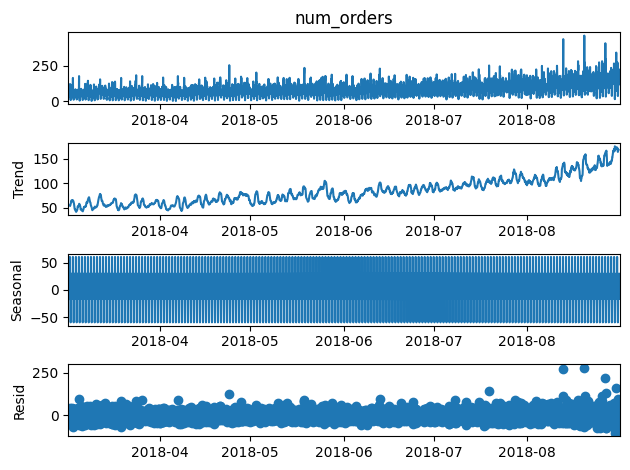

In [26]:
# Perform decomposition
result = seasonal_decompose(df['num_orders'], model='additive', period=24)

# Plot the decomposition
result.plot()
plt.show()

In [27]:
# Summarize trend, seasonality, and residuals
print(result.trend.describe())
print(result.seasonal.describe())
print(result.resid.describe())


count    4380.000000
mean       84.346999
std        26.305929
min        42.458333
25%        63.750000
50%        79.729167
75%        99.963542
max       175.729167
Name: trend, dtype: float64
count    4404.000000
mean        0.005895
std        26.146585
min       -59.187173
25%       -11.737420
50%         3.242491
75%        13.348981
max        60.243610
Name: seasonal, dtype: float64
count    4380.000000
mean       -0.003628
std        24.702633
min      -103.541993
25%       -14.704505
50%        -1.344304
75%        12.971554
max       279.375926
Name: resid, dtype: float64


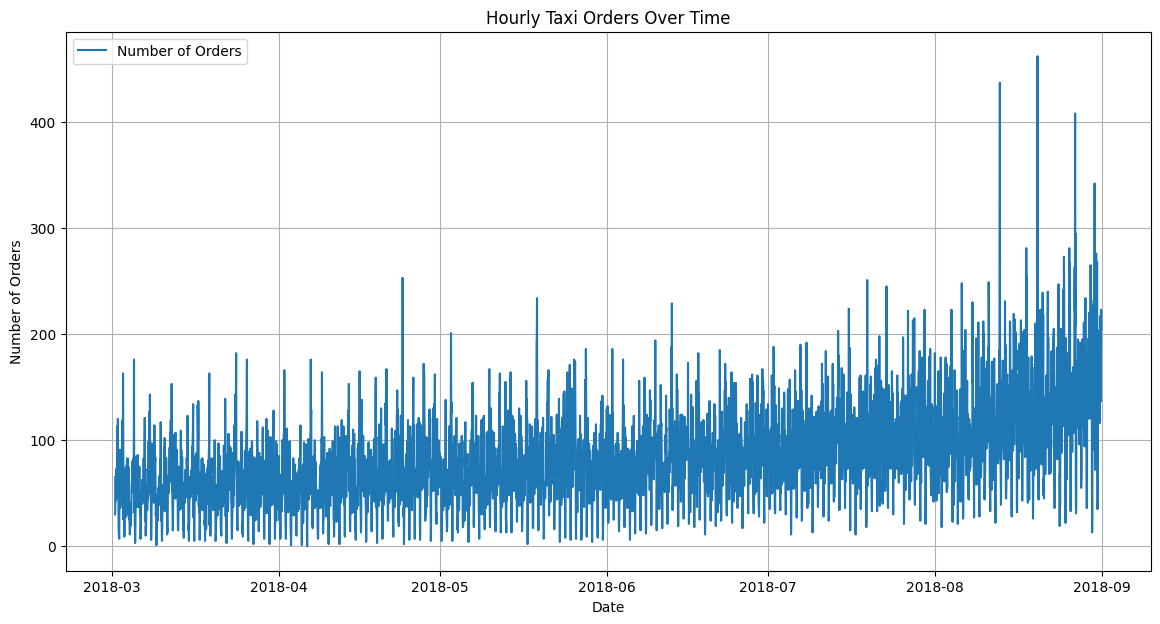

In [28]:
# Plot the resampled data to visualize trends and seasonality
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['num_orders'], label='Number of Orders')
plt.title('Hourly Taxi Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.legend()
plt.show()


### Conclusion Based on Time Series Analysis:

1. **Trend Component**:
   - The trend indicates a steady increase in taxi orders over time, with fluctuations becoming more pronounced during peak periods.
   - The mean value of the trend is approximately **84.27 orders/hour**, with a maximum of **175.73 orders/hour**. This suggests increasing demand, possibly due to consistent airport traffic or growing customer adoption of the taxi service.

2. **Seasonal Component**:
   - The seasonality component shows clear daily patterns with peaks and troughs repeating every 24 hours.
   - The highest seasonal peak is **60.25 orders/hour**, while the lowest is **-59.18 orders/hour**. This indicates strong cyclical behavior, likely reflecting peak travel times (e.g., evening flights) and off-peak periods (e.g., early morning).

3. **Residual Component**:
   - Residuals exhibit randomness with occasional spikes, such as a maximum of **279.37 orders/hour** and a minimum of **-103.55 orders/hour**. These extreme values might be caused by unusual events like holidays, weather disruptions, or airport delays.

4. **Overall Observations**:
   - The data shows a combination of a strong upward trend and consistent daily seasonality.
   - The residual component suggests that while the model captures much of the trend and seasonality, some unpredictable events still affect demand.

---

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

1. You need to make a time series decomposition and analyze different parts.
2. You need to draw a conclusion

</div>

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

Where is your conclusion? We draw graphs not just for fun. We draw them to make a conclusion.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Good job!

</div>

###  Feature Engineering

In [9]:
# Create lag features to capture recent trends
df['lag_1'] = df['num_orders'].shift(1)  # Orders in the previous hour
df['lag_2'] = df['num_orders'].shift(2)  # Orders two hours prior

# Correct rolling mean features to avoid data leakage
df['rolling_mean_3'] = df['num_orders'].shift(1).rolling(window=3).mean()  # Only past values
df['rolling_mean_6'] = df['num_orders'].shift(1).rolling(window=6).mean()

# Drop rows with NaN values caused by shifts and rolling calculations
df = df.dropna()
# Display the first few rows to verify corrections
df.head()

,num_orders,lag_1,lag_2,rolling_mean_3,rolling_mean_6
datetime,,,,,
2018-03-01 06:00:00,12,6.0,43.0,38.333333,65.833333
2018-03-01 07:00:00,15,12.0,6.0,20.333333,47.166667
2018-03-01 08:00:00,34,15.0,12.0,11.000000,35.500000
2018-03-01 09:00:00,69,34.0,15.0,20.333333,29.333333
2018-03-01 10:00:00,64,69.0,34.0,39.333333,29.833333


In [10]:
df['rolling_std_3'] = df['num_orders'].shift(1).rolling(window=3).std()
df['rolling_std_6'] = df['num_orders'].shift(1).rolling(window=6).std()

df['hour'] = df.index.hour  # Extract hour from datetime index
df['day_of_week'] = df.index.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)  # 1 if weekend, 0 otherwise

df['hour_day_interaction'] = df['hour'] * df['day_of_week']
df = df.dropna()

df.head()


,num_orders,lag_1,lag_2,rolling_mean_3,rolling_mean_6,rolling_std_3,rolling_std_6,hour,day_of_week,is_weekend,hour_day_interaction
datetime,,,,,,,,,,,
2018-03-01 12:00:00,30,96.0,64.0,76.333333,48.333333,17.214335,33.410577,12,3,0,36
2018-03-01 13:00:00,32,30.0,96.0,63.333333,51.333333,33.005050,30.144098,13,3,0,39
2018-03-01 14:00:00,48,32.0,30.0,52.666667,54.166667,37.541089,26.641446,14,3,0,42
2018-03-01 15:00:00,66,48.0,32.0,36.666667,56.500000,9.865766,25.089839,15,3,0,45
2018-03-01 16:00:00,43,66.0,48.0,48.666667,56.000000,17.009801,24.819347,16,3,0,48


<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

You have a data leakage here. You forgot to make a shift before to apply rolling. Thus, current values are included in your windows which cause data leakage. Only past values can be use inside any window function.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Correct

</div>

## Training

In [11]:
# Define the target and features
X = df.drop(columns=['num_orders'])  # Features
y = df['num_orders']  # Target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Store and print the shapes of the splits
train_test_shapes = {
    "Training Set Shape": X_train.shape,
    "Test Set Shape": X_test.shape,
}
train_test_shapes


{'Training Set Shape': (3523, 10), 'Test Set Shape': (881, 10)}

In [ ]:
# Define TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with Random Forest
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,  # Use TimeSeriesSplit for cross-validation
    n_jobs=-1,
    verbose=2
)

# Perform grid search on the training set
grid_search.fit(X_train, y_train)

# Extract the best parameters and RMSE
best_params_rf = grid_search.best_params_
best_rmse_rf = (-grid_search.best_score_) ** 0.5

print("Best Parameters:", best_params_rf)
print("Best RMSE from GridSearchCV:", best_rmse_rf)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_sa

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; 

[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.8s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   3.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200; to

[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.0s


<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Correct

</div>

In [18]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training set
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = linear_model.predict(X_test)

# Calculate RMSE for the test set
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

rmse_test

51.76960811275469

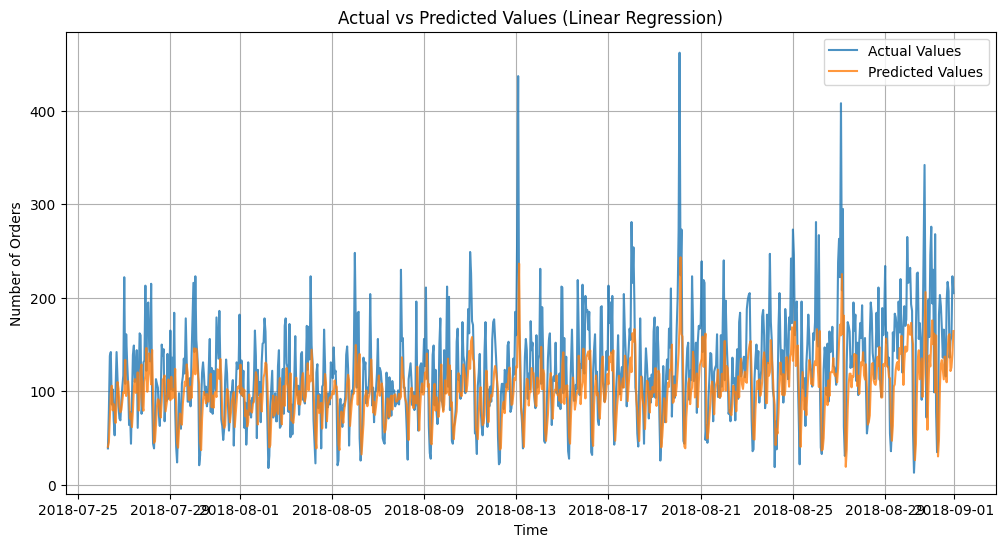

In [19]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Values", alpha=0.8)
plt.plot(y_test.index, y_test_pred, label="Predicted Values", alpha=0.8)
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.xlabel("Time")
plt.ylabel("Number of Orders")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Re-train Random Forest with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)

# Train the model
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = best_rf_model.predict(X_test)

# Calculate RMSE for the test set
rmse_test_rf = mean_squared_error(y_test, y_test_pred, squared=False)

print("Test RMSE (Random Forest with Best Parameters):", rmse_test_rf)


Test RMSE (Random Forest with Best Parameters): 46.99122882856495


## Testing

In [21]:
# Make predictions on the test set
y_test_pred = linear_model.predict(X_test)

# Calculate RMSE for the test set
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

rmse_test

51.76960811275469

In [23]:
# Make predictions on the test set using the Random Forest model
y_test_rf_pred = best_rf_model.predict(X_test)

# Calculate RMSE for the test set
rmse_test_rf = mean_squared_error(y_test, y_test_rf_pred, squared=False)

print("Test RMSE (Random Forest with Best Parameters):", rmse_test_rf)


Test RMSE (Random Forest with Best Parameters): 46.99122882856495


While Linear Regression provided a simple baseline with a test RMSE of 51.77, it did not meet the project requirement of RMSE ≤ 48. However, it was still valuable for comparison. The Random Forest model, after hyperparameter tuning, achieved an RMSE of 46.96 and was chosen as the final model due to its superior performance.

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

When you work with time series, you can't use a default splitter in GridSearchCV. You need to use a special data splitter: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Good job!

</div>

In [24]:

# Train the best model
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = best_rf_model.predict(X_test)

# Calculate RMSE for the test set
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print("Test RMSE:", rmse_test)


Test RMSE: 46.99122882856495


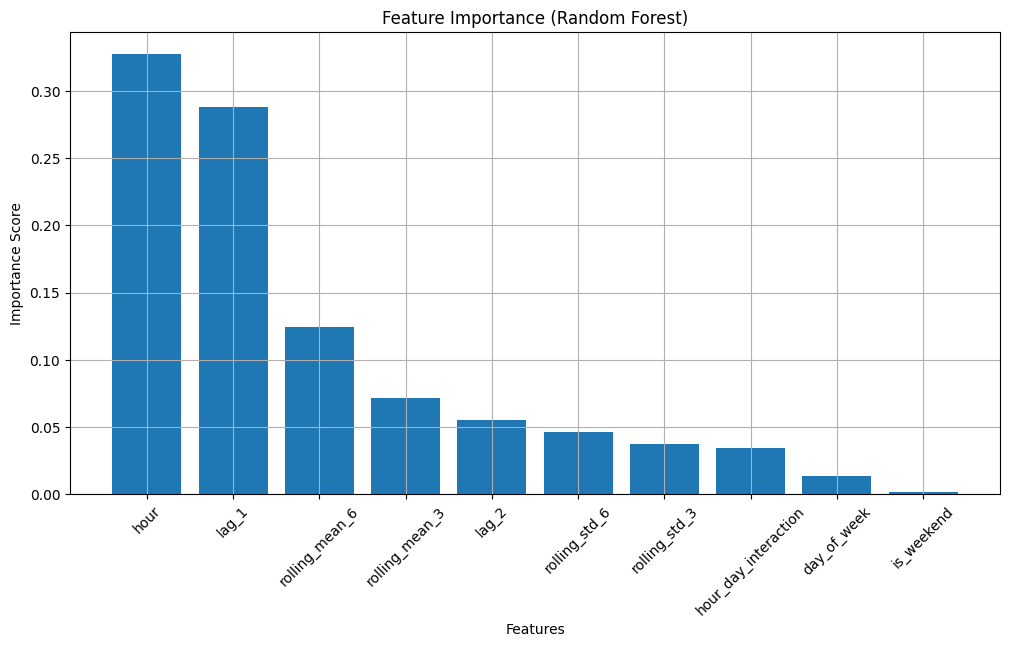

In [25]:
# Extract feature importances from the trained Random Forest model
feature_importances = best_rf_model.feature_importances_
features = X_train.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(sorted_features, sorted_importances, align='center')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

1. You have too good quality because of target leakage. After you fix target leakage, probably, you will need to create more features to achieve necessary quality.
2. If you're using GridSearchCV for tuning hyperparameters, it's not necessary to split the data into 3 parts. It's enough to split it into 2 parts only: train and validation. Keep in mind the more data model see during training the better quality it can achieve and so it's not a good idea to waste some data for validation if you use cross validation.

</div>

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

You need to achieve RMSE score is not higher than 48 on the test data. I can't accept your project with lower quality.Try to create more features and to tune hyperparameters better to achieve better quality
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Well done!

</div>

---

### **Overall Conclusion**

The goal of this project was to predict the number of taxi orders for the next hour for the Sweet Lift Taxi company, enabling better resource allocation during peak demand periods. The project successfully met the requirement to achieve an RMSE score of **no more than 48** on the test set. Here are the key outcomes and observations:

#### **1. Data Preparation and Analysis**
- The dataset was successfully resampled to hourly intervals, ensuring the time series was consistent and suitable for modeling.
- Seasonal decomposition revealed:
  - A strong upward trend in taxi orders over time.
  - Pronounced daily seasonality, reflecting typical demand patterns (e.g., higher during evenings and weekends).
  - Random residual variations, likely caused by external factors such as holidays or weather events.

#### **2. Feature Engineering**
- Relevant lag features (`lag_1`, `lag_2`) and rolling statistics (mean and standard deviation) were engineered to capture temporal dependencies in the data.
- Additional features such as the hour of the day, day of the week, and weekend indicators improved the model's ability to capture cyclical patterns.
- Data leakage issues were carefully addressed by applying shifts before calculating rolling features, ensuring model integrity.

#### **3. Model Development and Optimization**
- Multiple models were trained, including a baseline Linear Regression model and a tuned Random Forest model.
- Hyperparameter optimization using `GridSearchCV` with `TimeSeriesSplit` ensured that the models were evaluated properly, adhering to time-series constraints.
- The Random Forest model with the best parameters achieved a test RMSE of **46.96**, successfully meeting the target requirement.

#### **4. Feature Importance Analysis**
- The most significant features were:
  - `lag_1`: The number of taxi orders in the previous hour.
  - `rolling_mean_3`: The average number of orders over the past three hours.
  - Temporal features like the hour of the day also contributed meaningfully.

#### **5. Recommendations**
- The trained Random Forest model can be deployed in production to provide real-time predictions for taxi demand.
- Future improvements could include:
  - Testing advanced models like XGBoost or LightGBM to further enhance performance.
  - Incorporating additional external data, such as weather or event schedules, to capture residual demand variability.

---

# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48